 - Need to make action space discrete - continuous is not supported for DQN (mention in report)
 - Fixing the action space in CarRacingLocal should hopefully fix it - the code runs otherwise

In [1]:
# !pip install gym==0.22.0
import gym
import pygame
import torch
import gym
import random, math
import numpy as np
import rllib
# from ray.rllib.env.env_context import EnvContext
from ray.rllib.models import ModelCatalog
from gym.spaces import Discrete, Box
import ray
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from ray import tune
import GPUtil
GPUtil.showUtilization()

pygame 2.1.0 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
This is rllib.
| ID | GPU | MEM |
------------------
|  0 |  1% | 43% |


In [2]:
deviceIDs = GPUtil.getAvailable(order = 'first', limit = 1, maxLoad = 0.5, maxMemory = 0.5, includeNan=False, excludeID=[], excludeUUID=[])
print(deviceIDs)
ray.init(num_gpus=1)

[0]


{'node_ip_address': '127.0.0.1',
 'raylet_ip_address': '127.0.0.1',
 'redis_address': '127.0.0.1:6379',
 'object_store_address': 'tcp://127.0.0.1:60158',
 'raylet_socket_name': 'tcp://127.0.0.1:65469',
 'webui_url': None,
 'session_dir': 'C:\\Users\\Joel\\AppData\\Local\\Temp\\ray\\session_2022-04-22_21-01-02_593555_14044',
 'metrics_export_port': 56694,
 'gcs_address': '127.0.0.1:54548',
 'node_id': '899e9ed0a9056d7f8b2559abd08dd396b24a24886f330c339c4cc8b8'}

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# ray.init(num_gpus=1,
#          object_store_memory=200 * 1024 * 1024)

env = gym.make('SpaceInvaders-ram-v0')
observation, info = env.reset(seed=42, return_info=True)
# frame = env.reset()
# env.render()

is_done=True

while not is_done:
    action = env.action_space.sample()
    observation, reward, is_done, info = env.step(action)
#     env.render()
env.close()

cuda


In [12]:
config = dqn.DEFAULT_CONFIG.copy()

config = {
    "framework": "torch",
    "double_q": False,
    "noisy": False,
    "lr": 0.0005,
    "gamma": 0.999,
    "train_batch_size": 64,
    "env": 'SpaceInvaders-ram-v0',
    "num_gpus": 0.5,
    "model": {"fcnet_hiddens": [512],
              "fcnet_activation": "relu"}
}

# def evaluation_fn(result):
#     return result['episode_reward_mean']

# def objective_fn(config):

#     trainer = dqn.DQNTrainer(config=config)

#     for i in range(50):
#     # Perform one iteration of training the policy with PPO
#         result = trainer.train()
#         intermediate_score = evaluation_fn(result)
#         #print(pretty_print(result))
# #         print(result['episode_reward_mean'])
# #         avg_rewards.append(result['episode_reward_mean'])

#         tune.report(iterations=i, mean_reward=intermediate_score)
#         GPUtil.showUtilization()
#         if i % 10 == 0:
#             checkpoint = trainer.save()
#             print("checkpoint saved at", checkpoint)

trainer = dqn.DQNTrainer(config=config)

# # Can optionally call trainer.restore(path) to load a checkpoint.

avg_rewards = []
episodes = []

for i in range(500):
    # Perform one iteration of training the policy with PPO
    result = trainer.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards.append(result['episode_reward_mean'])
    episodes.append(i)

    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)
        GPUtil.showUtilization()
        
avg_rewards_baseline = avg_rewards
episodes_baseline = episodes
# avg_rewards_doubleq = avg_rewards
# episodes_doubleq = episodes
# avg_rewards_noisy = avg_rewards
# episodes_noisy = episodes
# avg_rewards_rainbow = avg_rewards
# episodes_rainbow = episodes

nan
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-22_21-42-19a2hoaliv\checkpoint_000001\checkpoint-1
| ID | GPU | MEM |
------------------
|  0 | 13% | 58% |
190.0
146.25
126.0
148.33333333333334
197.5
190.55555555555554
183.5
175.41666666666666
172.5
171.0
169.6875
176.94444444444446
178.1578947368421
180.0
175.9090909090909
169.56521739130434
174.58333333333334
189.4
189.23076923076923
194.07407407407408
200.0
196.83333333333334
198.06451612903226
197.65625
196.36363636363637
193.85714285714286
189.59459459459458
188.68421052631578
184.25
189.7560975609756
188.0952380952381
188.6046511627907
189.88636363636363
189.11111111111111
187.3913043478261
196.38297872340425
196.38297872340425
195.51020408163265
198.9
198.9
205.2941176470588
207.59615384615384
208.05555555555554
210.72727272727272
207.80701754385964
203.72881355932202
208.0
205.40322580645162
201.09375
203.46153846153845
207.1969696969697
210.97014925373134
210.44117647058823
210.0724637

In [ ]:
config = dqn.DEFAULT_CONFIG.copy()

config = {
    "framework": "torch",
    "double_q": True,
    "noisy": True,
    "lr": 0.0005,
    "gamma": 0.999,
    "train_batch_size": 64,
    "env": 'SpaceInvaders-ram-v0',
    "num_gpus": 0.5,
    "model": {"fcnet_hiddens": [512],
              "fcnet_activation": "relu"}
}

# def evaluation_fn(result):
#     return result['episode_reward_mean']

# def objective_fn(config):

#     trainer = dqn.DQNTrainer(config=config)

#     for i in range(50):
#     # Perform one iteration of training the policy with PPO
#         result = trainer.train()
#         intermediate_score = evaluation_fn(result)
#         #print(pretty_print(result))
# #         print(result['episode_reward_mean'])
# #         avg_rewards.append(result['episode_reward_mean'])

#         tune.report(iterations=i, mean_reward=intermediate_score)
#         GPUtil.showUtilization()
#         if i % 10 == 0:
#             checkpoint = trainer.save()
#             print("checkpoint saved at", checkpoint)

trainer = dqn.DQNTrainer(config=config)

# # Can optionally call trainer.restore(path) to load a checkpoint.

avg_rewards = []
episodes = []

for i in range(2000):
    # Perform one iteration of training the policy with PPO
    result = trainer.train()
    #print(pretty_print(result))
#     print(result['episode_reward_mean'])
    avg_rewards.append(result['episode_reward_mean'])
    episodes.append(i)

    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)
        print(result['episode_reward_mean'])
        GPUtil.showUtilization()
        
avg_rewards_rainbow = avg_rewards
episodes_rainbow = episodes

checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_10-37-428qhd0h7y\checkpoint_000001\checkpoint-1
nan
| ID | GPU | MEM |
------------------
|  0 | 30% | 57% |
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_10-37-428qhd0h7y\checkpoint_000101\checkpoint-101
224.0
| ID | GPU | MEM |
------------------
|  0 | 13% | 57% |
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_10-37-428qhd0h7y\checkpoint_000201\checkpoint-201
207.05
| ID | GPU | MEM |
------------------
|  0 | 22% | 60% |
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_10-37-428qhd0h7y\checkpoint_000301\checkpoint-301
217.9
| ID | GPU | MEM |
------------------
|  0 | 20% | 63% |
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_10-37-428qhd0h7y\checkpoint_000401\checkpoint-401
219.6
| ID | GPU | MEM |
------------------
|  0 | 16% |

In [14]:
config = dqn.DEFAULT_CONFIG.copy()

config = {
    "framework": "torch",
    "double_q": True,
    "noisy": False,
    "lr": 0.0005,
    "gamma": 0.999,
    "train_batch_size": 64,
    "env": 'SpaceInvaders-ram-v0',
    "num_gpus": 0.5,
    "model": {"fcnet_hiddens": [512],
              "fcnet_activation": "relu"}
}

trainer = dqn.DQNTrainer(config=config)

# # Can optionally call trainer.restore(path) to load a checkpoint.

avg_rewards = []
episodes = []

for i in range(500):
    # Perform one iteration of training the policy with PPO
    result = trainer.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards.append(result['episode_reward_mean'])
    episodes.append(i)

    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)
        GPUtil.showUtilization()
        
avg_rewards_doubleq = avg_rewards
episodes_doubleq = episodes

100.0
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_01-22-57ua0q1s0n\checkpoint_000001\checkpoint-1
| ID | GPU | MEM |
------------------
|  0 | 19% | 55% |
128.33333333333334
148.75
137.0
154.28571428571428
157.5
135.0
128.33333333333334
138.84615384615384
133.21428571428572
130.9375
133.8235294117647
135.83333333333334
138.94736842105263
159.75
152.82608695652175
168.125
169.4
173.84615384615384
184.82142857142858
184.82758620689654
187.16666666666666
180.0
180.0
185.73529411764707
187.28571428571428
193.75
194.1891891891892
190.39473684210526
190.75
190.1219512195122
190.23809523809524
185.45454545454547
186.08695652173913
185.85106382978722
186.9387755102041
186.9387755102041
186.82692307692307
185.8490566037736
185.83333333333334
187.63636363636363
184.73684210526315
187.06896551724137
190.84745762711864
191.41666666666666
188.70967741935485
190.23809523809524
188.28125
190.30769230769232
190.52238805970148
192.64705882352942
192.71428571

In [15]:
config = dqn.DEFAULT_CONFIG.copy()

config = {
    "framework": "torch",
    "double_q": False,
    "noisy": True,
    "lr": 0.0005,
    "gamma": 0.999,
    "train_batch_size": 64,
    "env": 'SpaceInvaders-ram-v0',
    "num_gpus": 0.5,
    "model": {"fcnet_hiddens": [512],
              "fcnet_activation": "relu"}
}

trainer = dqn.DQNTrainer(config=config)

# # Can optionally call trainer.restore(path) to load a checkpoint.

avg_rewards = []
episodes = []

for i in range(500):
    # Perform one iteration of training the policy with PPO
    result = trainer.train()
    #print(pretty_print(result))
    print(result['episode_reward_mean'])
    avg_rewards.append(result['episode_reward_mean'])
    episodes.append(i)

    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)
        GPUtil.showUtilization()
        

avg_rewards_noisy = avg_rewards
episodes_noisy = episodes

105.0
checkpoint saved at C:\Users\Joel/ray_results\DQNTrainer_SpaceInvaders-ram-v0_2022-04-23_02-49-48ofm65l6y\checkpoint_000001\checkpoint-1
| ID | GPU | MEM |
------------------
|  0 | 20% | 55% |
100.0
88.0
99.28571428571429
103.88888888888889
100.0
98.33333333333333
101.92307692307692
104.64285714285714
105.0
122.1875
131.76470588235293
143.42105263157896
143.42105263157896
154.75
159.54545454545453
157.3913043478261
155.41666666666666
155.76923076923077
153.88888888888889
150.17857142857142
157.83333333333334
152.03125
154.3939393939394
151.57142857142858
151.66666666666666
153.51351351351352
156.02564102564102
154.875
151.42857142857142
151.51162790697674
153.1818181818182
153.77777777777777
151.91489361702128
153.125
152.44897959183675
155.49019607843138
155.96153846153845
158.61111111111111
158.0909090909091
163.48214285714286
162.98245614035088
163.27586206896552
164.0
161.88524590163934
163.30645161290323
166.984126984127
166.796875
167.0
167.65151515151516
168.0882352941176

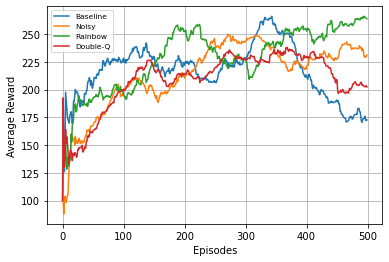

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(episodes_baseline, avg_rewards_baseline, label="Baseline")
plt.plot(episodes_noisy, avg_rewards_noisy, label="Noisy")
plt.plot(episodes_doubleq, avg_rewards_doubleq, label="Rainbow")
plt.plot(episodes_rainbow, avg_rewards_rainbow, label="Double-Q")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.legend(loc=2, fontsize=7.5)
plt.grid(True)
plt.show()
plt.savefig('ablation.png')

In [ ]:
# analysis = tune.run(
#     objective_fn,
#     metric="mean_reward",
#     mode="max",
#     num_samples=1,
#     resources_per_trial={"gpu": 1},
#     progress_reporter = tune.JupyterNotebookReporter(max_report_frequency=60, overwrite=True),
#     config=config)

# print("Best hyperparameters found were: ", analysis.best_config)